# Machine Learning 1, Übung 3
(c) 2023 by Harald Bögeholz

In [1]:
import numpy as np

np.random.seed(42)
m = 25
x = np.random.rand(m) * 10 - 5
y = 0.5*x*x + x + 3 + np.random.randn(m)

In [2]:
import math
import matplotlib.pyplot as plt

x_range = max(x) - min(x)
x_min = min(x) - 0.1 * x_range
x_max = max(x) + 0.1 * x_range
linX = np.linspace(x_min, x_max, num=400)
y_range = max(y) - min(y)
y_min = min(y) - 0.1 * y_range
y_max = max(y) + 0.1 * y_range

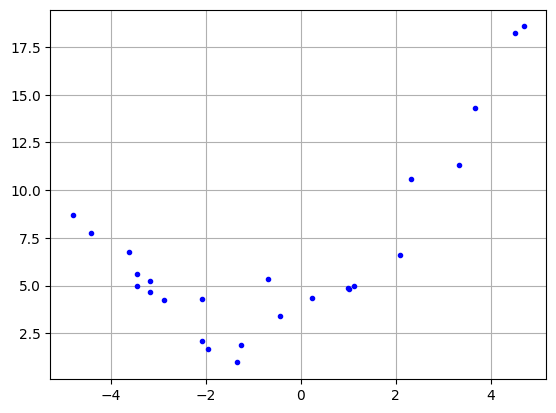

In [3]:
plt.plot(x,y,"b.")
plt.grid()
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression()

Für das Modell `LinearRegression` müssen wir unseren Datenvektor `x` in eine Matrix mit einer einzigen Spalte überführen:

In [6]:
X = x.reshape(-1,1)

Aufteilen in Trainings- und Testdaten:

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
model.fit(X_train, y_train)

LinearRegression()

In [9]:
model.score(X_train, y_train)

0.38548175574023413

In [10]:
model.score(X_test, y_test)

0.3491393634453166

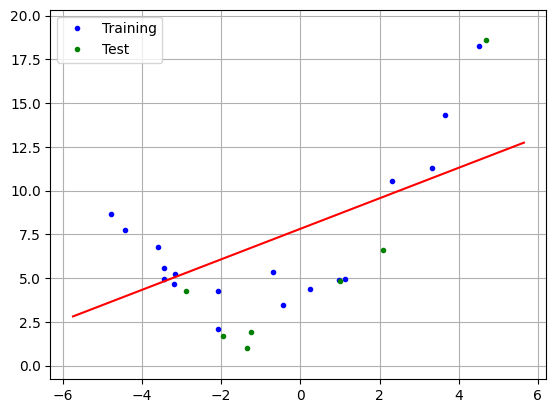

In [11]:
plt.ylim(y_min, y_max)
plt.plot(X_train, y_train, "b.", label="Training")
plt.plot(X_test, y_test, "g.", label="Test")
plt.legend()
plt.plot(linX, model.predict(linX.reshape(-1,1)), "r-")
plt.grid()
plt.show()

`PolynomialFeatures` erweitert eine Feature-Matrix um zusätzliche Spalten mit polynomialen Features, in unserem Fall mit Potenzen unseres Vektors.

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [14]:
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

In [15]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

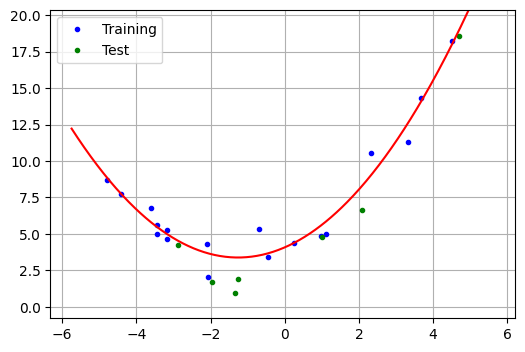

In [16]:
linX_poly = poly.fit_transform(linX.reshape(-1,1))
plt.figure(figsize=(6, 4))
plt.ylim(y_min, y_max)
plt.plot(X_train, y_train, "b.", label="Training")
plt.plot(X_test, y_test, "g.", label="Test")
plt.legend()
plt.plot(linX, poly_model.predict(linX_poly), "r-")
plt.grid()
plt.show()

In [17]:
poly_model.score(X_poly_train, y_train)

0.9544775922497662

In [19]:
poly_model.score(X_poly_test, y_test)

0.9309506828849835